# **Diabetes Prediction Model Project!!!**

## **EDA on Diabetes dataset!!!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

**Checking if the each column/feature is of correct datatype and has no null values**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Checking for null values**

In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Checking for duplicate values**

In [8]:
df.duplicated().sum()

np.int64(0)

# **Data Visualization**

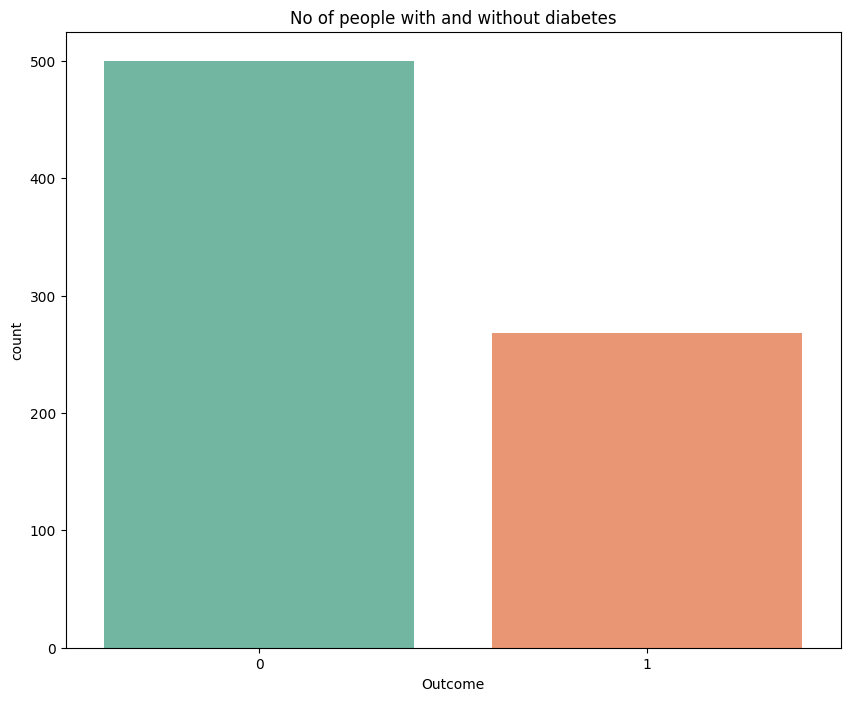

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(x='Outcome',data=df,palette='Set2')
plt.title('No of people with and without diabetes')
plt.show()


**Checking if any of the features contain outliers or not.**

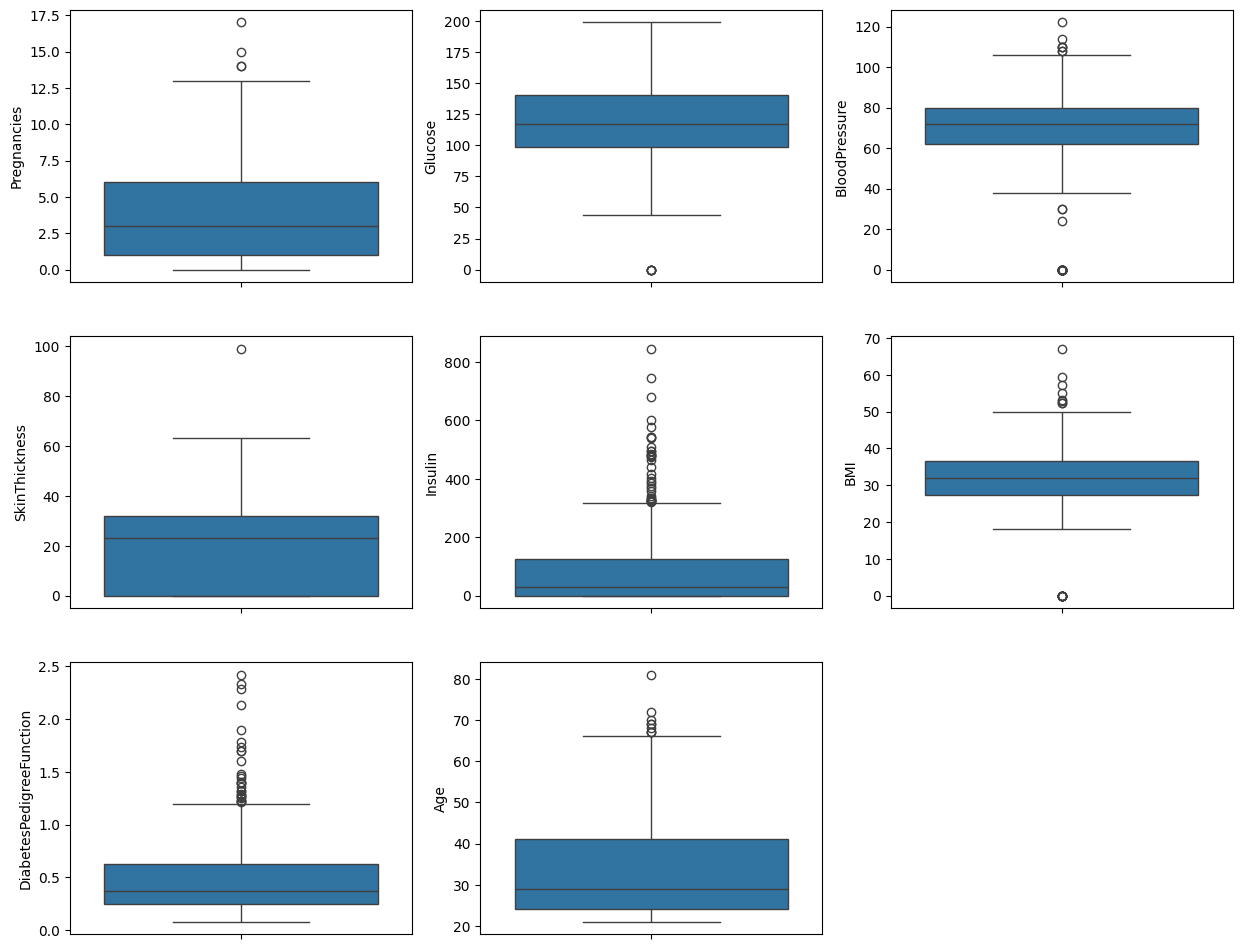

In [10]:
plt.figure(figsize=(15,12))
for i,col in enumerate(df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[col])
plt.show()

### **For removing Outliers we are using Capping method(clip())**

In [11]:
for col in df.columns[:-1]:
    q3 = df[col].describe()['75%']
    q1 = df[col].describe()['25%']
    IQR = q3 - q1
    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR
    df[col] = df[col].clip(lower_limit, upper_limit)

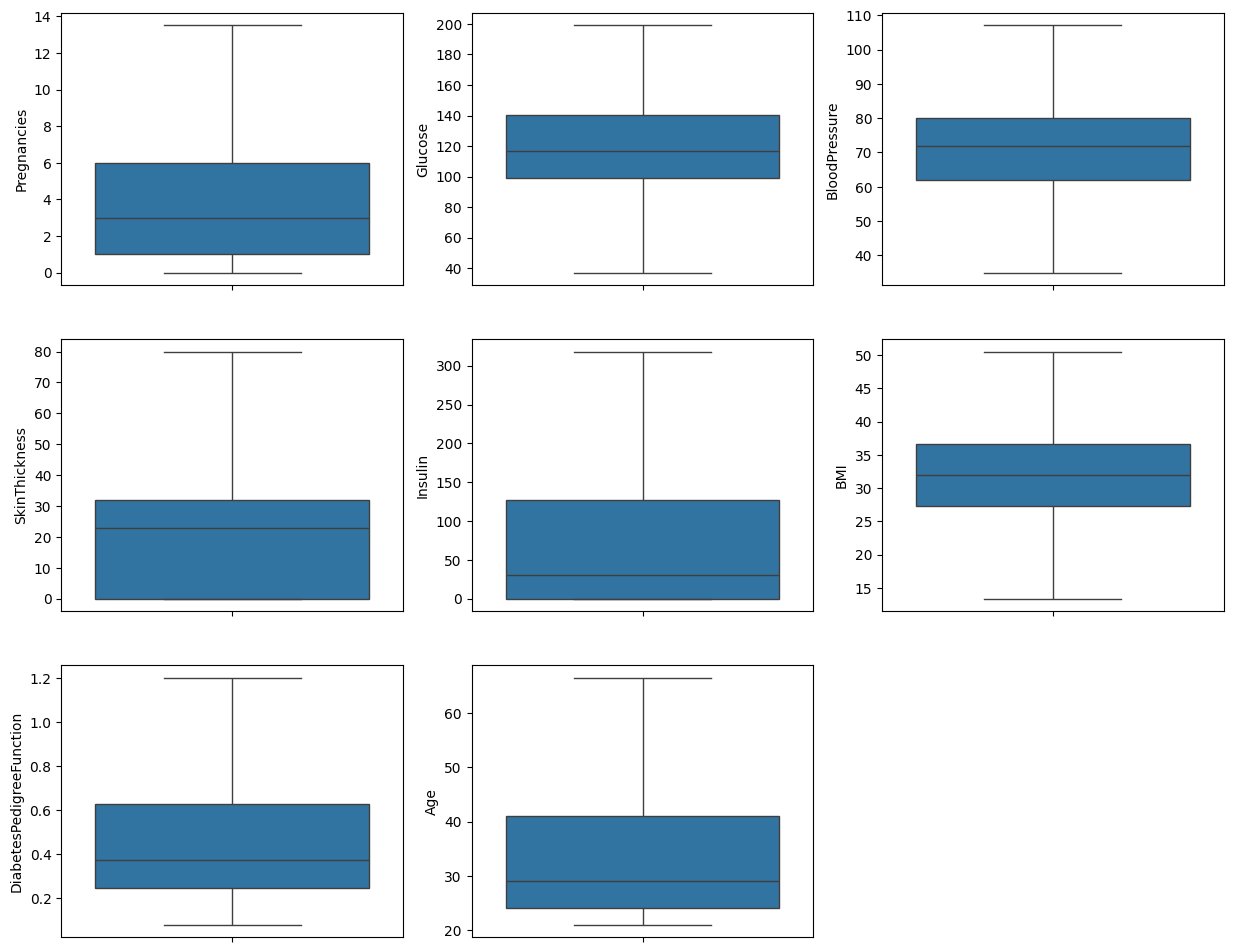

In [12]:
plt.figure(figsize=(15,12))
for i,col in enumerate(df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[col])
plt.show()

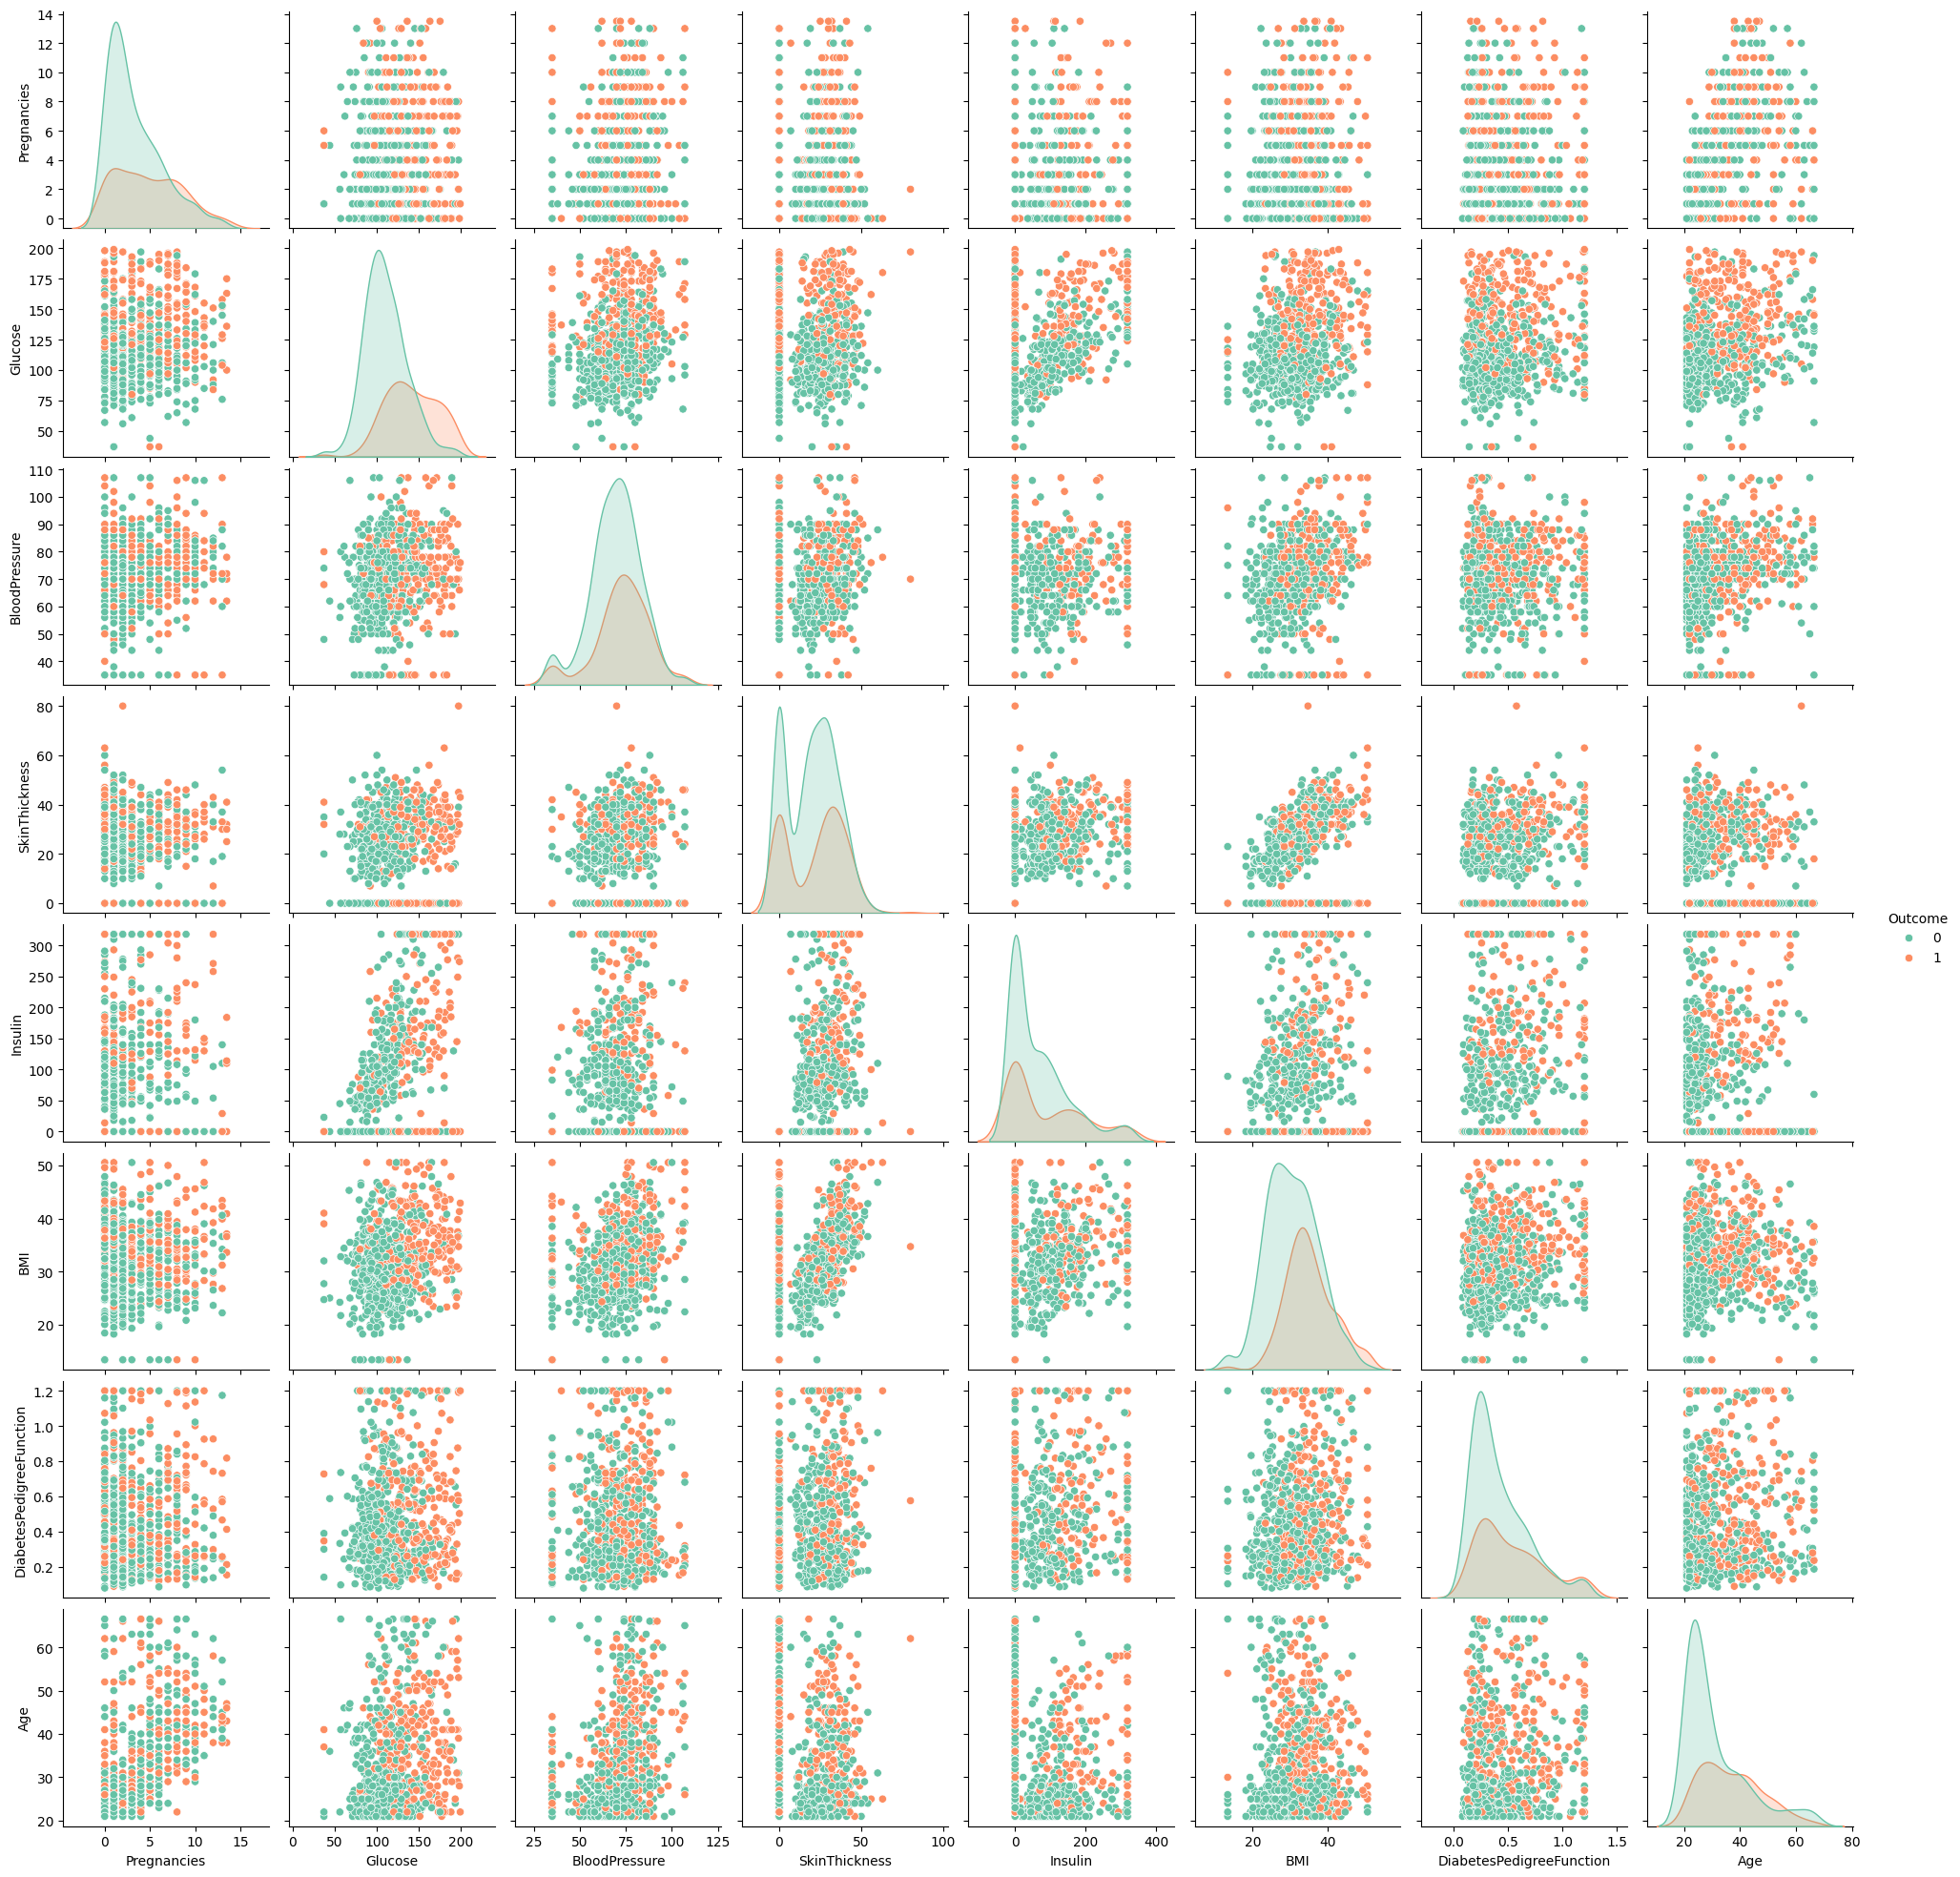

In [13]:
sns.pairplot(df,hue='Outcome',palette='Set2')
plt.show()

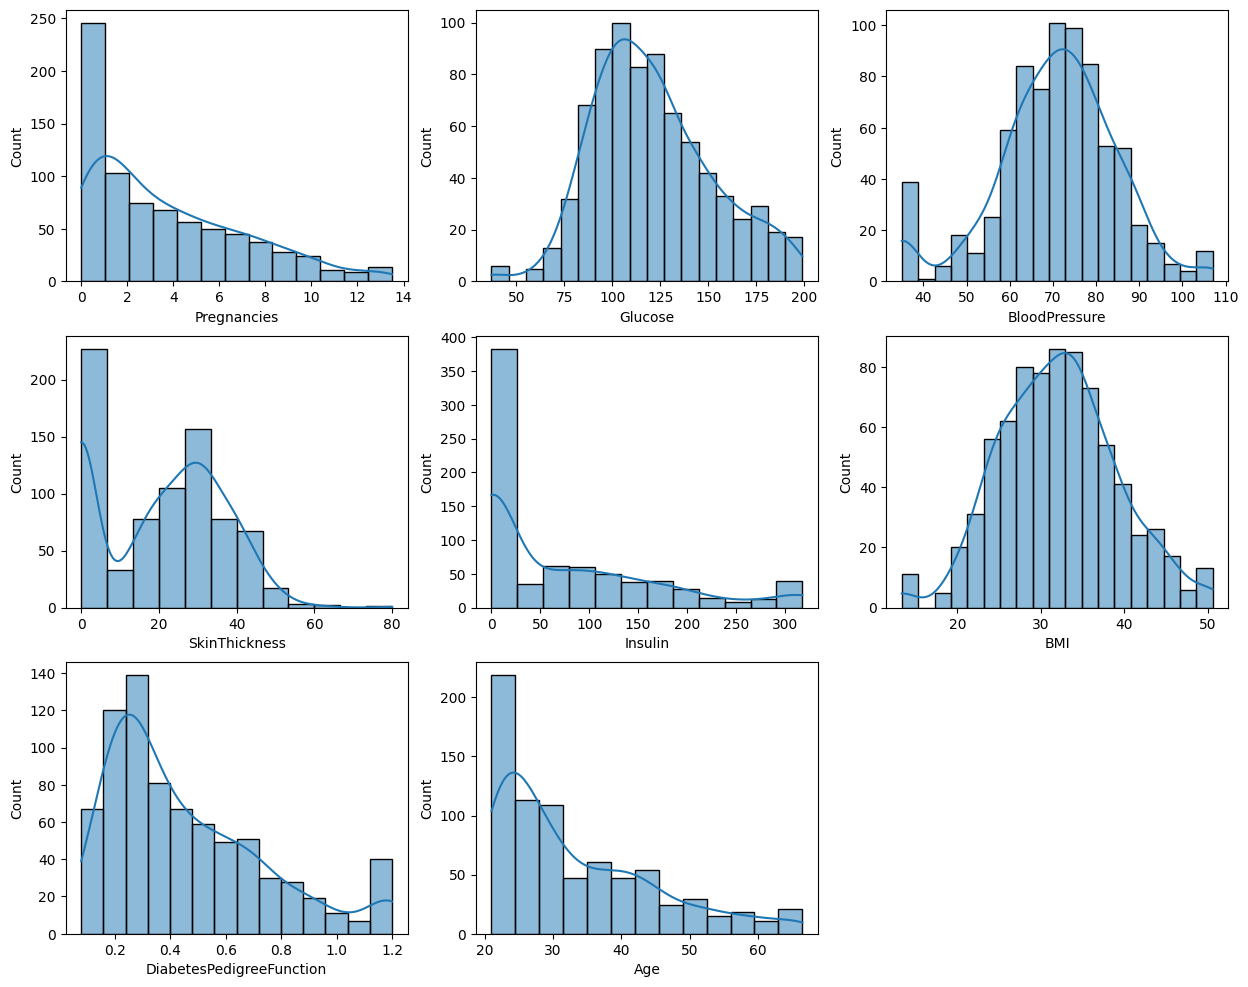

In [14]:
plt.figure(figsize=(15,12))
for i,col in enumerate(df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col],kde=True)
plt.show()

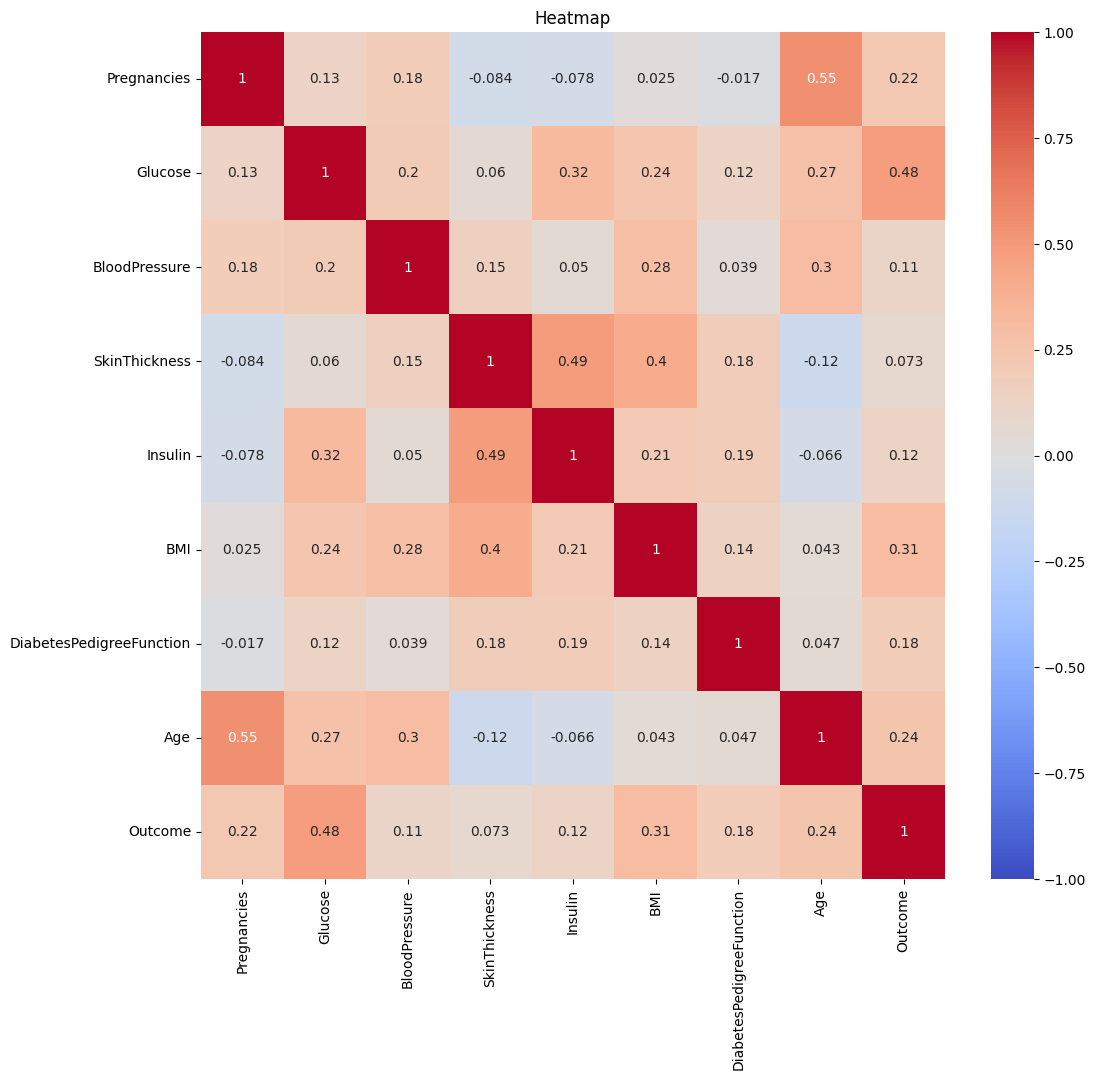

In [15]:
plt.figure(figsize=(12,11))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',center=0,vmin=-1.0)
plt.title('Heatmap')
plt.show()

### **Standardization(Scaling)**
Scales all the values in a standard range


In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = ss.fit_transform(df.drop('Outcome',axis=1))
x = pd.DataFrame(df_scaled,columns=df.columns[:-1])

In [17]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691
1,-0.848970,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304
2,1.245598,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252
3,-0.848970,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828
4,-1.148194,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199


In [18]:
y = df['Outcome']
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


## **TrainTestSplit**

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [22]:
max_train_score = max(train_scores)
train_scores_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
max_test_score = max(test_scores)
test_scores_index = [i for i , v in enumerate(test_scores) if v == max_test_score]

In [23]:
print("Max Train Score: {} % and K = {}".format(max_train_score*100,list(map(lambda x:x+1,train_scores_index))))
print("Max Test Score: {} % and K = {}".format(max_test_score*100,list(map(lambda x:x+1,test_scores_index))))

Max Train Score: 100.0 % and K = [1]
Max Test Score: 79.87012987012987 % and K = [10, 11, 12]


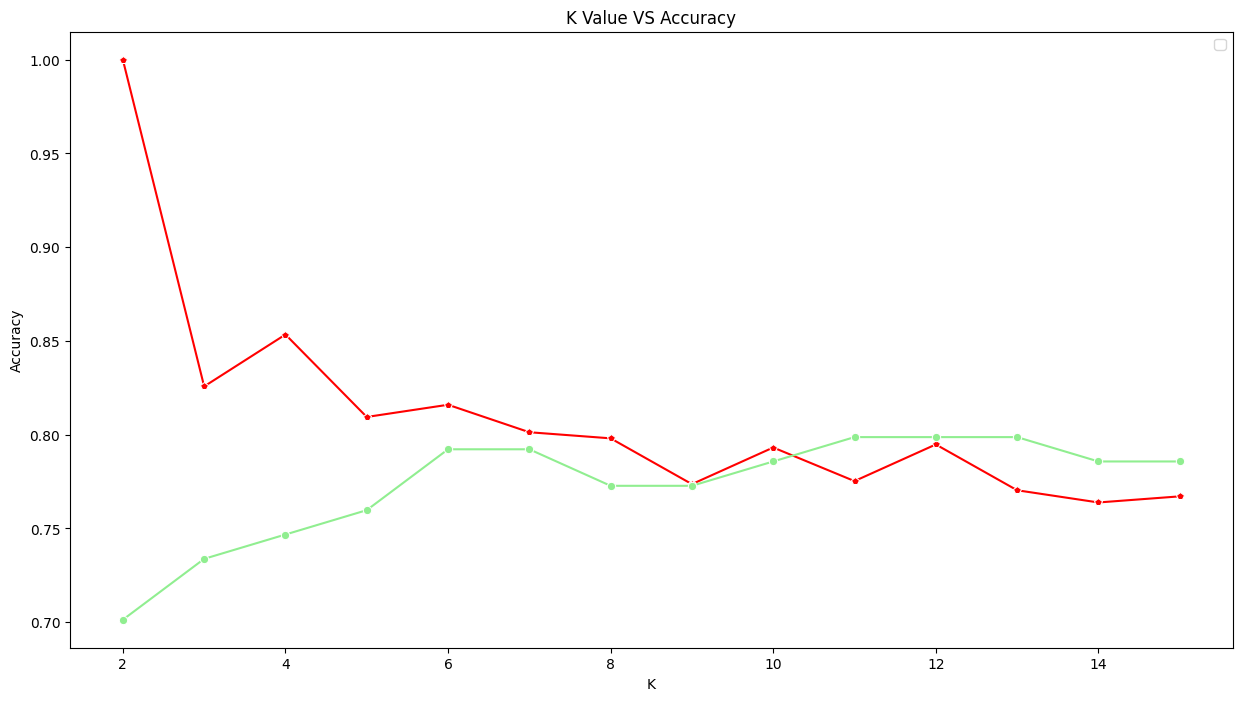

In [24]:
plt.figure(figsize=(15,8))
train_line = sns.lineplot(x=list(map(lambda x:x+1,range(1,15))),y=train_scores,marker='p',color='red')
test_line = sns.lineplot(x=list(map(lambda x:x+1,range(1,15))),y=test_scores,marker='o',color='lightgreen')
plt.legend()
plt.title('K Value VS Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7922077922077922

## **Evaluation:**

In [26]:
y_pred = knn.predict(x_test)

confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[98  9]
 [23 24]]


In [27]:
classification_report = classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

